In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Input, Dense, Embedding, LSTM, Dense, SimpleRNN, Bidirectional
from keras import optimizers

from keras.datasets import imdb

In [6]:
# Завантаження датасету
max_features = 10000  # обмежити кількість слів, щоб вибрати лише найпоширеніші
maxlen = 500  # обмежити розмір кожної рецензії

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Заповнення та обрізка послідовностей
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# параметри моделей 
epochs = 5
batch_size = 64
neurons = 64

In [7]:
def plot_accuracy(history, title):
    # Отримати історію точності з об'єкта історії навчання
    train_accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    # Зобразити графік точності
    epochs = range(1, len(train_accuracy) + 1)
    plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
    plt.title(f"Training and validation accuracy of {title} model")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [8]:
# Створення моделі RNN
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, neurons))
model_rnn.add(SimpleRNN(neurons))
model_rnn.add(Dense(1, activation="sigmoid"))

# Компіляція та тренування моделі
model_rnn.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model_rnn.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test)
)

Epoch 1/5
391/391 [==============================] - 59s 146ms/step - loss: 0.5692 - accuracy: 0.6911 - val_loss: 0.4716 - val_accuracy: 0.7830
Epoch 2/5
391/391 [==============================] - 54s 137ms/step - loss: 0.3974 - accuracy: 0.8331 - val_loss: 0.4018 - val_accuracy: 0.8247
Epoch 3/5
391/391 [==============================] - 56s 144ms/step - loss: 0.3398 - accuracy: 0.8598 - val_loss: 0.3522 - val_accuracy: 0.8523
Epoch 4/5
391/391 [==============================] - 54s 138ms/step - loss: 0.3203 - accuracy: 0.8732 - val_loss: 0.4423 - val_accuracy: 0.7950
Epoch 5/5
391/391 [==============================] - 55s 141ms/step - loss: 0.2880 - accuracy: 0.8841 - val_loss: 0.3801 - val_accuracy: 0.8390


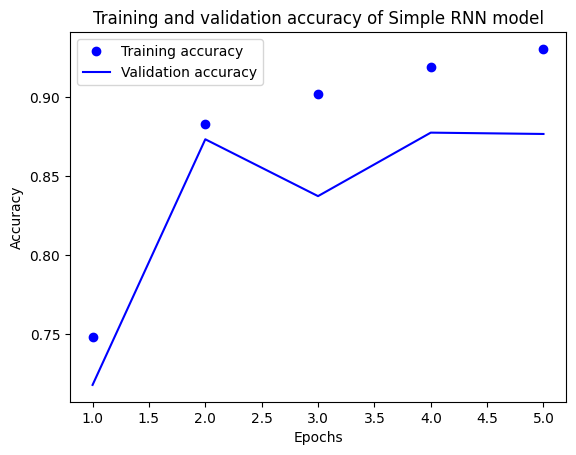

In [17]:
plot_accuracy(history, 'Simple RNN')

RNN навчання 4:37 хв - точність 83,9%

In [10]:
# Створення моделі LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, neurons))  # Векторне представлення слів
model_lstm.add(LSTM(neurons))  # LSTM шар
model_lstm.add(Dense(1, activation="sigmoid"))  # Вихідний шар

# Компіляція та тренування моделі
model_lstm.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)
history = model_lstm.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
)

Epoch 1/5
391/391 [==============================] - 186s 468ms/step - loss: 0.4854 - accuracy: 0.7568 - val_loss: 0.3295 - val_accuracy: 0.8648
Epoch 2/5
391/391 [==============================] - 180s 462ms/step - loss: 0.3062 - accuracy: 0.8782 - val_loss: 0.3056 - val_accuracy: 0.8742
Epoch 3/5
391/391 [==============================] - 175s 447ms/step - loss: 0.2578 - accuracy: 0.8999 - val_loss: 0.6534 - val_accuracy: 0.7794
Epoch 4/5
391/391 [==============================] - 175s 449ms/step - loss: 0.2258 - accuracy: 0.9153 - val_loss: 0.3174 - val_accuracy: 0.8705
Epoch 5/5
391/391 [==============================] - 191s 490ms/step - loss: 0.2022 - accuracy: 0.9256 - val_loss: 0.3402 - val_accuracy: 0.8773


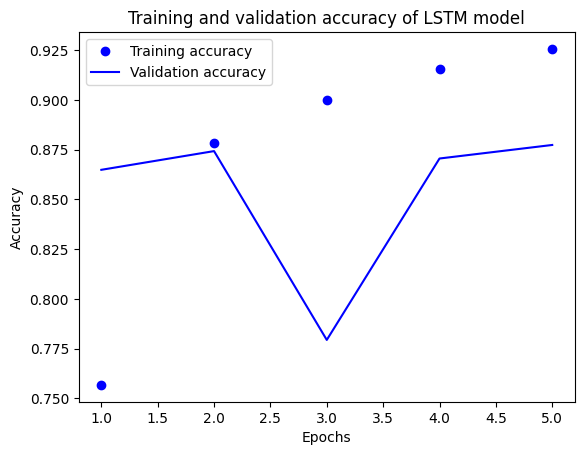

In [11]:
# Викликати функцію із історії навчання моделі
plot_accuracy(history, "LSTM")

LSTM навчання 15:09 хв - точність 87,8%

In [12]:
# Створення двухсторонньої моделі
model_bidirectional_lstm = Sequential()
model_bidirectional_lstm.add(Embedding(max_features, neurons))
model_bidirectional_lstm.add(Bidirectional(LSTM(neurons)))
model_bidirectional_lstm.add(Dense(1, activation="sigmoid"))

# Компіляція та тренування моделі
model_bidirectional_lstm.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)
history = model_bidirectional_lstm.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
)

Epoch 1/5
391/391 [==============================] - 388s 979ms/step - loss: 0.4965 - accuracy: 0.7444 - val_loss: 0.3331 - val_accuracy: 0.8593
Epoch 2/5
391/391 [==============================] - 360s 921ms/step - loss: 0.3063 - accuracy: 0.8774 - val_loss: 0.3042 - val_accuracy: 0.8754
Epoch 3/5
391/391 [==============================] - 366s 936ms/step - loss: 0.2571 - accuracy: 0.8996 - val_loss: 0.3077 - val_accuracy: 0.8797
Epoch 4/5
391/391 [==============================] - 362s 925ms/step - loss: 0.2267 - accuracy: 0.9164 - val_loss: 0.3887 - val_accuracy: 0.8614
Epoch 5/5
391/391 [==============================] - 457s 1s/step - loss: 0.2011 - accuracy: 0.9276 - val_loss: 0.3053 - val_accuracy: 0.8789


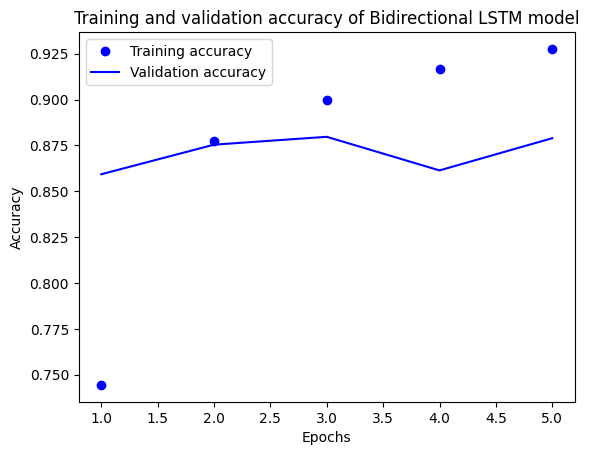

In [13]:
plot_accuracy(history, "Bidirectional LSTM")

Двонаправлена LSTM навчання 32:13 хв - точність 87,9%

In [14]:
# Створення глибокої моделі
model_deep = Sequential()
model_deep.add(Embedding(max_features, neurons))
model_deep.add(LSTM(neurons, return_sequences=True))
model_deep.add(LSTM(neurons))
model_deep.add(Dense(1, activation="sigmoid"))

# Компіляція та тренування моделі
model_deep.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)
history = model_deep.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
)

Epoch 1/5
391/391 [==============================] - 614s 2s/step - loss: 0.4884 - accuracy: 0.7482 - val_loss: 0.5586 - val_accuracy: 0.7181
Epoch 2/5
391/391 [==============================] - 479s 1s/step - loss: 0.2945 - accuracy: 0.8834 - val_loss: 0.3006 - val_accuracy: 0.8735
Epoch 3/5
391/391 [==============================] - 440s 1s/step - loss: 0.2520 - accuracy: 0.9021 - val_loss: 0.3735 - val_accuracy: 0.8375
Epoch 4/5
391/391 [==============================] - 439s 1s/step - loss: 0.2170 - accuracy: 0.9195 - val_loss: 0.2909 - val_accuracy: 0.8777
Epoch 5/5
391/391 [==============================] - 440s 1s/step - loss: 0.1903 - accuracy: 0.9306 - val_loss: 0.3060 - val_accuracy: 0.8768


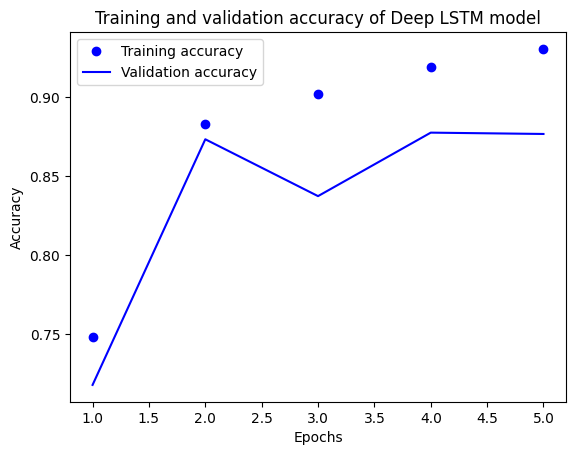

In [18]:
plot_accuracy(history, "Deep LSTM")

Глибока LSTM навчання 40:13 хв - точність 87,7%

Всі моделі мають схильність до перенавчання, тому я залишив 5 епох. Для класифікації рецензій за сантиментом вистачає простої LSTM, глибока і двонаправлена дуже довго навчаються при чому точність майже така сама.